# No Mixture, Simple Alternation

Notice that AlternatingManifoldHMC is **time-inhomogeneous** because at odd steps we use the HMC kernel whereas at even steps we use the Zappa one.

This version considers the case in which we alternate $1$ HMC step with $m$ Zappa steps. We perform $n$ HMC steps so that the total number of samples is given by $nm$

### Settings and Algorithm Run

In [1]:
import sys
sys.path.append("..")
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal, norm
from ManifoldHMCAlgorithms.alternating_manifoldhmc import AlternatingManifoldHMC
from utils import logf, logp
import matplotlib.pyplot as plt

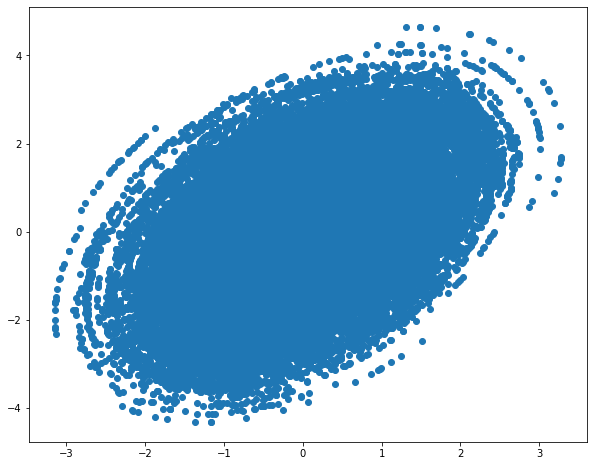

In [2]:
# Settings
Sigma = np.array([[1.0, 0.6], [0.6, 2.0]])  # Covariance Matrix of Target Distribution
mu = np.zeros(2)                            # Mean of target distribution
N = 50000                                   # Total number of samples
n = 1                                       # HMC steps per iteration
m = 20                                     # Number of Zappa samples per each HMC sample
T = 5                                       # Total integration time
epsilon = 0.05                              # Step size
M = np.eye(2)                               # Coviariance Matrix for momentum distribution
s = 0.5


# Target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

# Sample and plot
x0 = target.rvs()
samples = AlternatingManifoldHMC(x0, N=N, n=n, m=m, Sigma=Sigma, mu=mu, T=T, epsilon=epsilon, M=M, s=s)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(samples[:, 0], samples[:,1])
plt.show()

### Check convergence

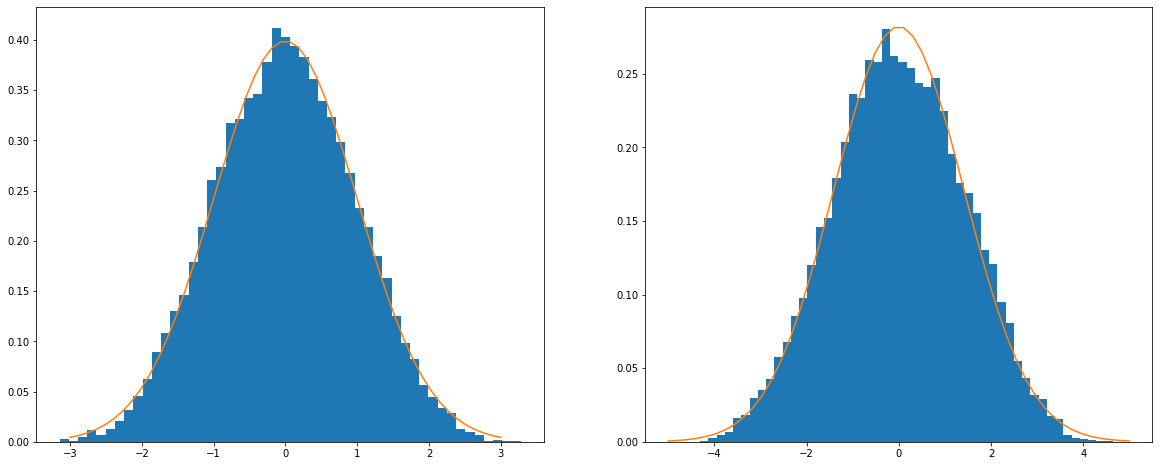

In [3]:
# marginals
marginal_x = norm(loc=mu[0], scale=np.sqrt(Sigma[0,0]))
marginal_y = norm(loc=mu[1], scale=np.sqrt(Sigma[1,1]))

# Plotting vars
xs = np.linspace(-3, 3)
ys = np.linspace(-5, 5)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# X space
_ = ax[0].hist(samples[:, 0], bins=50, density=True)
ax[0].plot(xs, marginal_x.pdf(xs))

# Y space
_ = ax[1].hist(samples[:, 1], bins=50, density=True)
ax[1].plot(ys, marginal_y.pdf(ys))

plt.show()